# Latent Dirichlet Allocation

In this final assignment, you will implement LDA and try it out on a corpus. Be sure to start work on this assignment early, because running your code will take some time. A full run of my implementation took about four hours. Consider running your code on smaller subcorpora during debugging.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import warnings

warnings.filterwarnings('ignore')

## Data loading

Try your Gibbs sampler on the corpus of 2000 movie reviews from Pang & Lee (2004), available on Classroom. The first line of the file specifies the number of documents. Then each subsequent line is one document, with the tokens separated by whitespace. I generated the file on Classroom from the original movie reviews by tokenizing them and then removing punctuation and stopwords, so you get nicer topics.

In [3]:
# ! pip install pyLDAvis

In [4]:
FORCE_RETRAIN_MODEL = False
PATH_TO_TRAINED_MODEL = 'full_model.json'

NUM_OF_TOPICS = 20
NUM_OF_ITERATIONS = 300
# -1 is default for saving only after full train
SAVE_EVERY_N_ITERATIONS = 50

DATA_DIRECTORY = '../../data/'

SOURCE_DATA_FILENAME = os.path.join(DATA_DIRECTORY, 'preprocessed_docs.txt')

In [16]:
import pyLDAvis

In [6]:
from lda_solution import DataHelper

data_helper = DataHelper(SOURCE_DATA_FILENAME, NUM_OF_TOPICS)

print(data_helper.NUM_OF_DOCS, data_helper.VOCAB_SIZE, data_helper.CORPUS_SIZE)

19334 111787 4773600


In [15]:
# I wanted to check topic distribution prior to all training
# We can see that it is almost uniform
sb_vis_data = data_helper.get_lda_vis_data()
pyLDAvis.display(sb_vis_data)

## Gibbs sampler

Implement a Gibbs sampler which resamples a topic for each word in the corpus according to the probability distribution in formula [5] of [Griffiths & Steyvers (2004)](https://www.pnas.org/content/101/suppl_1/5228). Initialize the topic assignments by choosing a topic uniformly at random for each token in the corpus. You can also refer to [Darling tutorial](https://u.cs.biu.ac.il/~89-680/darling-lda.pdf) for details of implementation.

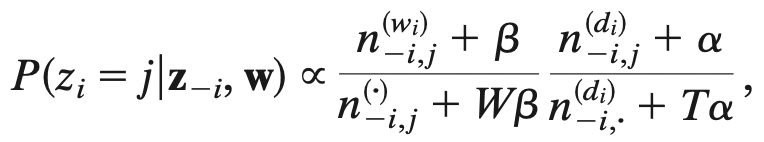

[238240, 238707, 239068, 238061, 238818, 238445, 239125, 239592, 239239, 238597, 238090, 238620, 238487, 238674, 238403, 238315, 238354, 239344, 238924, 238497]


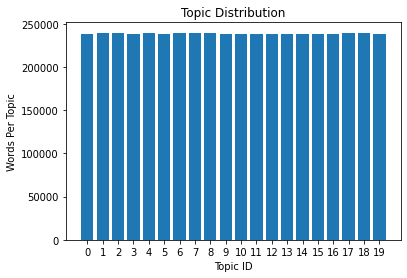

In [8]:
from lda_solution import plot_topic_distribution

print(data_helper.topic_counter)
plot_topic_distribution(data_helper.topic_counter)

Algorithm
```
        run for NUM_OF_ITERATIONS (hyperparam)
            for each word_document pair in corpus
                get current topic
                decrease all respective counts:
                    - general count of this topic;
                    - count of this topic for specific word;
                    - count of this topic in document;
                run loop over topics count K
                    re-evaluate word_to_topic sampling probabilites
                choose new topic for the word based on weights obtained above
                increase all respective counts
```

Apply Gibbs sample to full corpus:

In [9]:
from lda_solution import GibbsSampler

if FORCE_RETRAIN_MODEL:
    gibbs_sampler = GibbsSampler(data_helper)
    data_helper = gibbs_sampler.train(NUM_OF_ITERATIONS, iterations_to_save=SAVE_EVERY_N_ITERATIONS)
    path_to_trained_helper = data_helper.export_trained_helper()
else:
    data_helper = DataHelper.import_trained_helper(
        path_to_model_file=PATH_TO_TRAINED_MODEL,
        base_data_helper=data_helper,
    )
    data_helper.run_consistency_tests()

[94065, 163967, 173534, 229049, 405405, 216710, 244369, 142876, 251161, 235916, 113090, 356443, 62545, 510724, 357903, 159560, 272008, 69715, 193407, 521153]


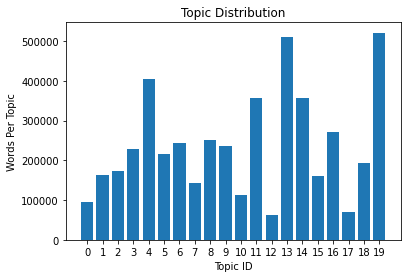

In [10]:
# distribution after training
print(data_helper.topic_counter)
plot_topic_distribution(data_helper.topic_counter)

I have decided to use [pyLDAvis](!https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf) and set $\lambda$ (relevance metric parameter) to 0.2 to check unique words for each topic. Also, PCA plot helps to understand whether we learned some different topics or not.

In [11]:
def create_lda_vis_data(model_path: str, source_datapath: str):
    """Returns LDA visualisation data."""
    imported_data_helper = DataHelper.import_trained_helper(
        path_to_model_file=model_path,
        path_to_source_data=source_datapath,
    )
    imported_data_helper.run_consistency_tests()

    print(imported_data_helper.NUM_OF_DOCS, imported_data_helper.VOCAB_SIZE, imported_data_helper.CORPUS_SIZE)
    return imported_data_helper.get_lda_vis_data()

In [12]:
# 300 iters, full corpus, default parameters
full_vis_data = create_lda_vis_data('full_model.json', os.path.join(DATA_DIRECTORY, 'preprocessed_docs.txt'))
pyLDAvis.display(full_vis_data)

19334 111787 4773600


In [13]:
# 300 iters, 'before' corpus, default parameters
before_vis_data = create_lda_vis_data('before_model.json', os.path.join(DATA_DIRECTORY, 'before_docs.txt'))
pyLDAvis.display(before_vis_data)

14026 100980 3502539


In [14]:
# 300 iters, 'after' corpus, default parameters
after_vis_data = create_lda_vis_data('after_model.json', os.path.join(DATA_DIRECTORY, 'after_docs.txt'))
pyLDAvis.display(after_vis_data)

5308 37034 1271061
